K-Means clustering

For centroid initialization the "Naive Sharding Centroid Initialization Method" is used. 

For reference: https://www.kdnuggets.com/2017/03/naive-sharding-centroid-initialization-method.html


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn import datasets
iris = datasets.load_iris()


In [8]:
class KMeans:
    
    def __init__(self, train_data, max_iter):
        
        if isinstance(train_data, np.ndarray):
            
            self.train_data = train_data
        
        elif isinstance(train_data, pd.DataFrame):
            
            self.train_data = train_data.to_numpy()
        
        else:
            
            print("please provide either a numpy array or a pandas DataFrame as training data")
            return
        
        self.max_iter = max_iter
    
    def initialize_centroids(self):
        
        # add sum of each row to the end of the array, then sort the array according to the sums
        data = np.append(self.train_data, np.sum(self.train_data, axis = 1)[np.newaxis].T, axis = 1)
        data = data[data[:,-1].argsort()]
        
        # split data, for each centroid one part
        data = np.array_split(data, self.clusters)
        
        # calculate centroid for each part of data
        self.centroids = [np.mean(array, axis = 0)[:-1] for array in data]
            
    
    def update_centroids(self):
        
        # initialize clustered_train_data as train_data + indexes where the indexes are all 0s. This increases computational speed
        indexes = np.zeros((self.train_data.shape[0],1))
        #indexes = np.asarray([0]*self.train_data.shape[0])[np.newaxis].T
        self.clustered_train_data = np.append(self.train_data, indexes, axis = 1)
        
        # initialize updated_centroids as a list of 0s
        self.updated_centroids = [0]*len(self.centroids)
        
        switch = True
        counter = 0
        
        while switch and counter <= self.max_iter:
            
            # set index counter
            i = 0
        
            # find the distances between each point and the current centroids
            for point in self.train_data:
            
                distances = np.asarray([np.linalg.norm(point-centroid) for centroid in self.centroids])
            
                # replace the 0s with the index of the centroid that has the lowest distance to a point 
                index_min_distance = np.argmin(distances)
                self.clustered_train_data[i,-1] = index_min_distance
                
                # update index counter 
                i += 1
            
            # get the new centroids 
            for i in range(len(self.centroids)):
                
                sub_array = self.clustered_train_data[self.clustered_train_data[:,-1] == i]
                centroid = np.mean(sub_array, axis = 0)[:-1]
                self.updated_centroids[i] = centroid
                
            
            # compare centroids with updated_centroids
            total_difference = 0
            
            for i in range(len(self.centroids)):
                
                total_difference += sum(np.absolute(np.subtract(self.centroids[i],self.updated_centroids[i])))
            
            
            if total_difference < 0.001:
                 
                switch = False
                
            else:
                
                self.centroids = self.updated_centroids
                counter += 1
                
  
    def fit(self, clusters):
        
        """
        train_data is either a numpy array or a pandas dataframe that will be transformed to a numpy array 
        """
        self.clusters = clusters
        self.initialize_centroids()
        self.update_centroids()
      
        
    def best_k(self, max_k):
        
        """
        tests distortion for each k and plots it as a graph
        """
        # storage for coordinates
        x = []
        y = []
        
        for k in range(1,max_k+1):
            
            self.fit(k)
            
            total_distortion = 0
            
            for i in range(len(self.updated_centroids)):
                
                sub_array = self.clustered_train_data[self.clustered_train_data[:,-1] == i]
        
                
                sub_array = sub_array[:,:-1]
                
                
                distortion = sum([np.linalg.norm(point - self.updated_centroids[i]) for point in sub_array])
                
                total_distortion += distortion/len(sub_array)
                
                
            total_distortion = total_distortion/len(self.updated_centroids)
            
            x.append(k)
            y.append(total_distortion)
            
        

        fig = plt.figure()
        ax = plt.axes()
        ax.plot(x, y);      
                
    def predict(self, test_data):
        
        distances = np.asarray([np.linalg.norm(test_data-centroid) for centroid in self.updated_centroids])
        return np.argmin(distances)
        

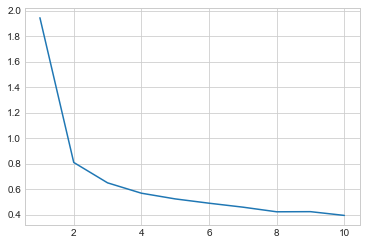

In [10]:
model = KMeans(iris.data, 10)
model.best_k(10)

In [11]:
model.fit(3)